In [2]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
train = pd.read_csv('./datasets/train.csv')

In [4]:
train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [5]:
train[train['Garage Area'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [6]:
train.shape

(2051, 81)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [8]:
test = pd.read_csv('./datasets/test.csv')

In [9]:
test.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New


In [10]:
test.shape

(878, 80)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [12]:
# Looking at the data dicitonary and the dataframe there are some columns that I want to 
# investigate further and some I will want to convert to different types. Given how many columns
# are in this dataframe, I might want to make a copy with the columns that I want to look at 

In [13]:
df_test = test.copy()

In [14]:
df = train.copy()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [17]:
df.drop(columns=['Id','PID','MS Zoning', 'Lot Frontage', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
        'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'House Style', 'Year Remod/Add',
        'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
        'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
        'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical',
        'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'TotRms AbvGrd', 'Fireplace Qu', 
        'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Qual', 'Garage Cond', 
        'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool QC', 'Fence', 'Misc Feature', 
        'Misc Val', 'Mo Sold', 'Yr Sold'], inplace=True) 

In [18]:
df_test.drop(columns=['Id','PID','MS Zoning', 'Lot Frontage', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
        'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'House Style', 'Year Remod/Add',
        'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
        'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
        'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical',
        'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'TotRms AbvGrd', 'Fireplace Qu', 
        'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Qual', 'Garage Cond', 
        'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool QC', 'Fence', 'Misc Feature', 
        'Misc Val', 'Mo Sold', 'Yr Sold'], inplace=True) 

In [19]:
# Dropped a ton of columns in my copy df that I suspect won't have a ton of influence over price
# and will just add noise. I can always add these later if I want to

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MS SubClass    2051 non-null   int64  
 1   Lot Area       2051 non-null   int64  
 2   Utilities      2051 non-null   object 
 3   Neighborhood   2051 non-null   object 
 4   Bldg Type      2051 non-null   object 
 5   Overall Qual   2051 non-null   int64  
 6   Overall Cond   2051 non-null   int64  
 7   Year Built     2051 non-null   int64  
 8   Foundation     2051 non-null   object 
 9   Heating        2051 non-null   object 
 10  Heating QC     2051 non-null   object 
 11  Central Air    2051 non-null   object 
 12  1st Flr SF     2051 non-null   int64  
 13  2nd Flr SF     2051 non-null   int64  
 14  Gr Liv Area    2051 non-null   int64  
 15  Full Bath      2051 non-null   int64  
 16  Half Bath      2051 non-null   int64  
 17  Bedroom AbvGr  2051 non-null   int64  
 18  Kitchen 

In [21]:
# I am going to remove the Utilities column from this df because most houses are in the saem
# category I suspect it wont influence price too much
df['Utilities'].value_counts()

Utilities
AllPub    2049
NoSeWa       1
NoSewr       1
Name: count, dtype: int64

In [22]:
df.drop(columns='Utilities', axis=1, inplace=True)
df_test.drop(columns='Utilities', axis=1, inplace=True)

In [23]:
df['Functional'].value_counts()

Functional
Typ     1915
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: count, dtype: int64

In [24]:
# Next I wanted to look at that one null value in garage area
df[df['Garage Area'].isna()]

,MS SubClass,Lot Area,Neighborhood,Bldg Type,Overall Qual,Overall Cond,Year Built,Foundation,Heating,Heating QC,...,Kitchen Qual,Functional,Fireplaces,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Pool Area,Sale Type,SalePrice
1712,70,9060,IDOTRR,1Fam,5,6,1923,BrkTil,GasA,Ex,...,Gd,Typ,0,NaN,Y,174,0,0,WD,150909


In [25]:
df['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [26]:
df.loc[df['Garage Area'] == 0, 'SalePrice'].describe()

count       113.000000
mean     105669.150442
std       33704.765812
min       34900.000000
25%       82375.000000
50%      104000.000000
75%      128000.000000
max      200500.000000
Name: SalePrice, dtype: float64

In [27]:
# This entry is a problem. I don't want to change that NaN to a 0 because the sale price is 
# extraordinarily high for a home with Garage Area = 0. I don't necessarily want to drop it 
# from my data frame. I might leave it for now and hope it doesn't give my regression trouble later

In [28]:
# I am going to convert this to ordinals

df['Paved Drive'].value_counts()

Paved Drive
Y    1861
N     151
P      39
Name: count, dtype: int64

In [29]:
pave_mapping = {
    'Y' : 3,
    'P' : 2,
    'N' : 1
}

df['Paved Drive'] = df['Paved Drive'].map(pave_mapping)
df_test['Paved Drive'] = df_test['Paved Drive'].map(pave_mapping)

In [30]:
df['Paved Drive'].value_counts()

Paved Drive
3    1861
1     151
2      39
Name: count, dtype: int64

In [31]:
# Going to ordinal this as well

df['Heating QC'].value_counts()

Heating QC
Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: count, dtype: int64

In [32]:
ordinal_mapping = {
    'Ex' : 5,
    'TA' : 4,
    'Gd' : 3,
    'Fa' : 2,
    'Po' : 1
}

df['Heating QC'] = df['Heating QC'].map(ordinal_mapping)
df_test['Heating QC'] = df_test['Heating QC'].map(ordinal_mapping)

In [33]:
df['Heating QC'].value_counts()

Heating QC
5    1065
4     597
3     319
2      67
1       3
Name: count, dtype: int64

In [34]:
# to ordinals as well
df['Kitchen Qual'].value_counts()

Kitchen Qual
TA    1047
Gd     806
Ex     151
Fa      47
Name: count, dtype: int64

In [35]:
df['Kitchen Qual'] = df['Kitchen Qual'].map(ordinal_mapping)
df_test['Kitchen Qual'] = df_test['Kitchen Qual'].map(ordinal_mapping)

In [36]:
df['Kitchen Qual'].value_counts()

Kitchen Qual
4    1047
3     806
5     151
2      47
Name: count, dtype: int64

In [37]:
# Going to convert these to 1's and 0's

df['Central Air'].value_counts()

Central Air
Y    1910
N     141
Name: count, dtype: int64

In [38]:
df['Central Air'].replace({'Y':1, 'N':0}, inplace=True)
df_test['Central Air'].replace({'Y':1, 'N':0}, inplace=True)

/var/folders/0z/8t2n0rh15pdgwzdh2t34zs4c0000gn/T/ipykernel_84189/1780678042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Central Air'].replace({'Y':1, 'N':0}, inplace=True)
/var/folders/0z/8t2n0rh15pdgwzdh2t34zs4c0000gn/T/ipykernel_84189/1780678042.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

In [39]:
df['Central Air'].dtypes

dtype('int64')

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MS SubClass    878 non-null    int64 
 1   Lot Area       878 non-null    int64 
 2   Neighborhood   878 non-null    object
 3   Bldg Type      878 non-null    object
 4   Overall Qual   878 non-null    int64 
 5   Overall Cond   878 non-null    int64 
 6   Year Built     878 non-null    int64 
 7   Foundation     878 non-null    object
 8   Heating        878 non-null    object
 9   Heating QC     878 non-null    int64 
 10  Central Air    878 non-null    int64 
 11  1st Flr SF     878 non-null    int64 
 12  2nd Flr SF     878 non-null    int64 
 13  Gr Liv Area    878 non-null    int64 
 14  Full Bath      878 non-null    int64 
 15  Half Bath      878 non-null    int64 
 16  Bedroom AbvGr  878 non-null    int64 
 17  Kitchen AbvGr  878 non-null    int64 
 18  Kitchen Qual   878 non-null   

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MS SubClass    2051 non-null   int64  
 1   Lot Area       2051 non-null   int64  
 2   Neighborhood   2051 non-null   object 
 3   Bldg Type      2051 non-null   object 
 4   Overall Qual   2051 non-null   int64  
 5   Overall Cond   2051 non-null   int64  
 6   Year Built     2051 non-null   int64  
 7   Foundation     2051 non-null   object 
 8   Heating        2051 non-null   object 
 9   Heating QC     2051 non-null   int64  
 10  Central Air    2051 non-null   int64  
 11  1st Flr SF     2051 non-null   int64  
 12  2nd Flr SF     2051 non-null   int64  
 13  Gr Liv Area    2051 non-null   int64  
 14  Full Bath      2051 non-null   int64  
 15  Half Bath      2051 non-null   int64  
 16  Bedroom AbvGr  2051 non-null   int64  
 17  Kitchen AbvGr  2051 non-null   int64  
 18  Kitchen 

In [42]:
# let's make some preds with a few of my columns
X_test = df_test.drop(columns = [ 'Neighborhood', 'Bldg Type', 'Foundation', 'Heating', 'Sale Type',
           'Functional', 'Garage Area'])
X = df.drop(columns = ['SalePrice', 'Neighborhood', 'Bldg Type', 'Foundation', 'Heating', 'Sale Type',
           'Functional', 'Garage Area'])
y = df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)

print(f'The score for my training data is {lr.score(X_train,y_train)}')
print(f'The score for my training data is {lr.score(X_val,y_val)}')

The score for my training data is 0.7948814195109274
The score for my training data is 0.8536943853341805


In [43]:
# Not bad for inital try, lets fit on X and y

lr.fit(X,y)

LinearRegression()

In [44]:
preds = lr.predict(X_test)

In [45]:
predictions_1 = test.copy()

In [46]:
predictions_1['SalePrice']= preds

In [47]:
predictions_1.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,114548.808044
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,158787.580926
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,208691.449574


In [48]:
predictions_1 = predictions_1[['Id', 'SalePrice']].set_index('Id')

In [49]:
predictions_1.shape

(878, 1)

In [50]:
predictions_1.to_csv('./datasets/first_iteration.csv')

In [51]:
# First model was pretty solid I am going to create some dummy variables 
# for neighborhood and include that in my next iteration.

In [52]:
df.head(3)

,MS SubClass,Lot Area,Neighborhood,Bldg Type,Overall Qual,Overall Cond,Year Built,Foundation,Heating,Heating QC,...,Kitchen Qual,Functional,Fireplaces,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Pool Area,Sale Type,SalePrice
0,60,13517,Sawyer,1Fam,6,8,1976,CBlock,GasA,5,...,3,Typ,0,475.0,3,0,44,0,WD,130500
1,60,11492,SawyerW,1Fam,7,5,1996,PConc,GasA,5,...,3,Typ,1,559.0,3,0,74,0,WD,220000
2,20,7922,NAmes,1Fam,5,7,1953,CBlock,GasA,4,...,3,Typ,0,246.0,3,0,52,0,WD,109000


In [53]:
df['Neighborhood'].value_counts()

Neighborhood
NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [54]:
df = pd.get_dummies(df, columns=['Neighborhood'], dtype=int)
df.head(3)

,MS SubClass,Lot Area,Bldg Type,Overall Qual,Overall Cond,Year Built,Foundation,Heating,Heating QC,Central Air,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,13517,1Fam,6,8,1976,CBlock,GasA,5,1,...,0,0,0,0,1,0,0,0,0,0
1,60,11492,1Fam,7,5,1996,PConc,GasA,5,1,...,0,0,0,0,0,1,0,0,0,0
2,20,7922,1Fam,5,7,1953,CBlock,GasA,4,1,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df_test = pd.get_dummies(df_test, columns=['Neighborhood'], dtype=int)
df_test.head(3)

,MS SubClass,Lot Area,Bldg Type,Overall Qual,Overall Cond,Year Built,Foundation,Heating,Heating QC,Central Air,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,190,9142,2fmCon,6,8,1910,Stone,GasA,3,0,...,0,0,1,0,0,0,0,0,0,0
1,90,9662,Duplex,5,4,1977,CBlock,GasA,4,1,...,0,0,0,0,1,0,0,0,0,0
2,60,17104,1Fam,7,5,2006,PConc,GasA,5,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# let's run another regression with this new column
X_test = df_test.drop(columns = ['Bldg Type', 'Foundation', 'Heating', 'Sale Type',
           'Functional', 'Garage Area'])
X = df.drop(columns = ['SalePrice', 'Bldg Type', 'Foundation', 'Heating', 'Sale Type',
           'Functional', 'Garage Area', 'Neighborhood_GrnHill', 'Neighborhood_Landmrk' ])
y = df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)


print(f'New training score is {lr.score(X_train, y_train)}')
print(f'New testing score is {lr.score(X_val, y_val)}')

New training score is 0.8389295825260163
New testing score is 0.868239230120389


In [57]:
lr.fit(X,y)

LinearRegression()

In [58]:
preds = lr.predict(X_test)

In [59]:
predictions_2 = test.copy()

In [60]:
predictions_2['SalePrice'] = preds

In [61]:
predictions_2.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,113446.982881
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,158576.988400
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,192718.948349


In [62]:
predictions_2 = predictions_2[['Id', 'SalePrice']].set_index('Id')

In [63]:
predictions_2.shape

(878, 1)

In [64]:
predictions_2.to_csv('./datasets/second_iteration.csv')

In [65]:
# Nearly 87% percent of the testing data variance explained by
# this model. That feels pretty good, but I think we can do better

# Let's try to add garage area. Fingers crossed null value doesnt give an error
# it did give an error of course, it is only one entry so I am going to remove the row

In [66]:
df[df['Garage Area'].isna() == True]

,MS SubClass,Lot Area,Bldg Type,Overall Qual,Overall Cond,Year Built,Foundation,Heating,Heating QC,Central Air,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
1712,70,9060,1Fam,5,6,1923,BrkTil,GasA,5,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# Chat GPT helped with the code to drop only this specific row

df = df.dropna(subset=['Garage Area'])
df_test = df_test.dropna(subset=['Garage Area'])

df['Garage Area'].isnull().sum()

0

In [68]:
X_test = df_test.drop(columns = ['Bldg Type', 'Foundation', 'Heating', 'Sale Type',
           'Functional'])
X = df.drop(columns = ['SalePrice', 'Bldg Type', 'Foundation', 'Heating', 'Sale Type',
           'Functional', 'Neighborhood_GrnHill', 'Neighborhood_Landmrk' ])
y = df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)


print(f'New training score is {lr.score(X_train, y_train)}')
print(f'New testing score is {lr.score(X_val, y_val)}')

New training score is 0.8418420551990313
New testing score is 0.873358834991322


In [69]:
# going to add the total basement sf column back to my df and remove the null value

In [70]:
df['Total Bsmt SF'] = train['Total Bsmt SF']
df = df.dropna(subset=['Total Bsmt SF'])
df_test['Total Bsmt SF'] = test['Total Bsmt SF']
df_test = df_test.dropna(subset=['Total Bsmt SF'])

In [71]:
X_test = df_test.drop(columns = ['Bldg Type', 'Foundation', 'Heating', 'Sale Type',
           'Functional'])
X = df.drop(columns = ['SalePrice', 'Bldg Type', 'Foundation', 'Heating', 'Sale Type',
           'Functional', 'Neighborhood_GrnHill', 'Neighborhood_Landmrk' ])
y = df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)


print(f'New training score is {lr.score(X_train, y_train)}')
print(f'New testing score is {lr.score(X_val, y_val)}')

New training score is 0.8434617218311062
New testing score is 0.8765375711715839


In [72]:
df['BsmtFin SF 1'] = train['BsmtFin SF 1']
df_test['BsmtFin SF 1'] = test['BsmtFin SF 1']

In [73]:
X_test = df_test.drop(columns = ['Bldg Type', 'Foundation', 'Heating', 'Sale Type',
           'Functional'])
X = df.drop(columns = ['SalePrice', 'Bldg Type', 'Foundation', 'Heating', 'Sale Type',
           'Functional', 'Neighborhood_GrnHill', 'Neighborhood_Landmrk' ])
y = df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)


print(f'New training score is {lr.score(X_train, y_train)}')
print(f'New testing score is {lr.score(X_val, y_val)}')

New training score is 0.8484765486648892
New testing score is 0.8846631406357914


In [74]:
# Now let's dummify and incorporate building type

In [75]:
df = pd.get_dummies(df, columns= ['Bldg Type'], dtype=int)
df_test = pd.get_dummies(df_test, columns= ['Bldg Type'], dtype=int)

In [76]:
X_test = df_test.drop(columns = ['Foundation', 'Heating', 'Sale Type',
           'Functional'])
X = df.drop(columns = ['SalePrice', 'Foundation', 'Heating', 'Sale Type',
           'Functional', 'Neighborhood_GrnHill', 'Neighborhood_Landmrk' ])
y = df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)


print(f'New training score is {lr.score(X_train, y_train)}')
print(f'New testing score is {lr.score(X_val, y_val)}')

New training score is 0.852184834051613
New testing score is 0.8876380371938506


In [77]:
df['Functional'].value_counts()

Functional
Typ     1913
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: count, dtype: int64

In [78]:
df = pd.get_dummies(df, columns= ['Functional'], dtype=int)
df_test = pd.get_dummies(df_test, columns= ['Functional'], dtype=int)

In [79]:
X_test = df_test.drop(columns = ['Foundation', 'Heating', 'Sale Type'])

X = df.drop(columns = ['SalePrice', 'Foundation', 'Heating', 'Sale Type',
                        'Functional_Sal', 'Functional_Sev', 'Neighborhood_GrnHill',
                      'Neighborhood_Landmrk'])
y = df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)


print(f'New training score is {lr.score(X_train, y_train)}')
print(f'New testing score is {lr.score(X_val, y_val)}')

New training score is 0.8526807335814703
New testing score is 0.8903052087987885


In [80]:
# 89% is pretty good. I am going to submit these results but 
# I want to get to 90%!

In [81]:
lr.fit(X,y)

LinearRegression()

In [82]:
preds = lr.predict(X_test)

In [83]:
predictions_3 = test.copy()
predictions_3['SalePrice']=preds
predictions_3 = predictions_3[['Id', 'SalePrice']].set_index('Id')
predictions_3.shape

(878, 1)

In [84]:
predictions_3.to_csv('./datasets/third_iteration.csv')

In [85]:
df['Foundation'].value_counts()

Foundation
PConc     925
CBlock    863
BrkTil    220
Slab       34
Stone       5
Wood        2
Name: count, dtype: int64

In [86]:
df=pd.get_dummies(df,columns=['Foundation'],dtype=int)
df_test=pd.get_dummies(df_test,columns=['Foundation'],dtype=int)

In [87]:
df.shape

(2049, 73)

In [88]:
df_test.shape

(878, 68)

In [89]:
X_test = df_test.drop(columns = ['Heating', 'Sale Type'])

X = df.drop(columns = ['SalePrice', 'Heating', 'Sale Type',
                        'Functional_Sal', 'Functional_Sev', 'Neighborhood_GrnHill',
                      'Neighborhood_Landmrk'])
y = df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)


print(f'New training score is {lr.score(X_train, y_train)}')
print(f'New testing score is {lr.score(X_val, y_val)}')

New training score is 0.8532682153951059
New testing score is 0.8915707749687796


In [90]:
df['Yr Sold'] = train['Yr Sold']
df_test['Yr Sold']= test['Yr Sold']

In [91]:
X_test = df_test.drop(columns = ['Heating', 'Sale Type'])

X = df.drop(columns = ['SalePrice', 'Heating', 'Sale Type',
                        'Functional_Sal', 'Functional_Sev', 'Neighborhood_GrnHill',
                      'Neighborhood_Landmrk'])
y = df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)


print(f'New training score is {lr.score(X_train, y_train)}')
print(f'New testing score is {lr.score(X_val, y_val)}')

New training score is 0.8533317281126812
New testing score is 0.8917284193575552


In [92]:
lr.fit(X,y)

LinearRegression()

In [93]:
preds= lr.predict(X_test)

In [94]:
predictions_4 = test.copy()
predictions_4['SalePrice']= preds
predictions_4 = predictions_4[['Id', 'SalePrice']].set_index('Id')

In [95]:
predictions_4.to_csv('./datasets/fourth_iteration.csv')

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049 entries, 0 to 2050
Data columns (total 74 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MS SubClass           2049 non-null   int64  
 1   Lot Area              2049 non-null   int64  
 2   Overall Qual          2049 non-null   int64  
 3   Overall Cond          2049 non-null   int64  
 4   Year Built            2049 non-null   int64  
 5   Heating               2049 non-null   object 
 6   Heating QC            2049 non-null   int64  
 7   Central Air           2049 non-null   int64  
 8   1st Flr SF            2049 non-null   int64  
 9   2nd Flr SF            2049 non-null   int64  
 10  Gr Liv Area           2049 non-null   int64  
 11  Full Bath             2049 non-null   int64  
 12  Half Bath             2049 non-null   int64  
 13  Bedroom AbvGr         2049 non-null   int64  
 14  Kitchen AbvGr         2049 non-null   int64  
 15  Kitchen Qual          2049

In [98]:
df.describe()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Gr Liv Area,...,Functional_Sal,Functional_Sev,Functional_Typ,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Yr Sold
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,...,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.00000,2049.000000,2049.000000
mean,57.020498,10067.712055,6.113714,5.561249,1971.745242,4.293802,0.931186,1164.727672,329.218155,1499.464129,...,0.000976,0.000976,0.933626,0.107369,0.421181,0.451440,0.016593,0.00244,0.000976,2007.775988
std,42.836359,6745.127386,1.425991,1.104537,30.168060,0.856139,0.253199,396.565535,425.638942,500.461893,...,0.031235,0.031235,0.248995,0.309658,0.493869,0.497758,0.127774,0.04935,0.031235,1.312533
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1.000000,0.000000,334.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2006.000000
25%,20.000000,7500.000000,5.000000,5.000000,1954.000000,4.000000,1.000000,879.000000,0.000000,1130.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2007.000000
50%,50.000000,9434.000000,6.000000,5.000000,1974.000000,5.000000,1.000000,1093.000000,0.000000,1444.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2008.000000
75%,70.000000,11515.000000,7.000000,6.000000,2001.000000,5.000000,1.000000,1405.000000,691.000000,1728.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2009.000000
max,190.000000,159000.000000,10.000000,9.000000,2010.000000,5.000000,1.000000,5095.000000,1862.000000,5642.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2010.000000


In [99]:
X_test = df_test.drop(columns = ['Heating', 'Sale Type'])

X = df.drop(columns = ['SalePrice', 'Heating', 'Sale Type',
                        'Functional_Sal', 'Functional_Sev', 'Neighborhood_GrnHill',
                      'Neighborhood_Landmrk'])
y = df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 random_state = 42)

In [100]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_val_sc = sc.transform(X_val)

In [101]:
lr.fit(X_train_sc, y_train)

LinearRegression()

In [102]:
print(f'Scaled training score is {lr.score(X_train_sc, y_train)}')
print(f'Scaled testing score is {lr.score(X_val_sc, y_val)}')

Scaled training score is 0.8533308343985457
Scaled testing score is 0.8916709779359319


In [103]:
# Tried to see if scaling would imppact my score and it didn't really

In [104]:
lr.coef_

array([-8.13752247e+03,  1.87810628e+03,  1.89836309e+04,  6.22177304e+03,
        1.15406112e+04,  1.70400980e+03, -1.22235513e+03,  1.08090702e+03,
       -2.78750950e+03,  2.39712008e+04,  5.11503361e+03,  2.46348042e+03,
       -2.08283814e+03, -2.99572283e+03,  4.99653709e+03,  4.53727734e+03,
        5.56951165e+03, -7.17880330e+02,  3.14340547e+03, -1.55811695e+02,
       -2.58017787e+03, -7.39901593e+03, -3.99760554e+03, -6.61397774e+03,
       -1.62766522e+04, -7.41120126e+03, -2.32014354e+04, -1.19219441e+04,
       -2.45319838e+04, -2.17386907e+04, -1.69646593e+03, -1.68328457e+04,
       -6.67393915e+03, -1.63319720e+04, -3.06384486e+04, -7.56765887e+03,
       -1.97599479e+04, -6.19264060e+03, -5.09256518e+03, -2.50662042e+04,
       -1.17022093e+04, -2.09203323e+04, -1.78531076e+04, -1.58721951e+04,
       -5.71301269e+02, -1.01298212e+04, -6.16758743e+03, -1.28008113e+03,
        7.22024065e+03,  2.54687468e+16,  1.00701826e+16,  1.17885177e+16,
        1.17885177e+16,  

In [105]:
# I am pretty happy with my model. It's not perfect, but it explains about 89% of the variance
# in my test data. I am now going to create some graphs to illustrate why I think the variables
# I selected were good to use.

In [106]:
df['Overall Qual']

0       6
1       7
2       5
3       5
4       6
       ..
2046    8
2047    4
2048    6
2049    4
2050    7
Name: Overall Qual, Length: 2049, dtype: int64

In [107]:
df['SalePrice']

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2049, dtype: int64

In [108]:
def line_of_best_fit(x,y):
    x_bar = x.mean()
    y_bar = y.mean()
    std_x = x.std()
    std_y = y.std()
    r_xy = np.corrcoef(x,y)[0][1]
    beta_1 = r_xy*(std_y/std_x)
    beta_0 = y_bar - beta_1 * x_bar
    return beta_0 + beta_1 * x

In [109]:
df['slr_bf_overall_qual'] = line_of_best_fit(df['Overall Qual'],
                                            df['SalePrice'])

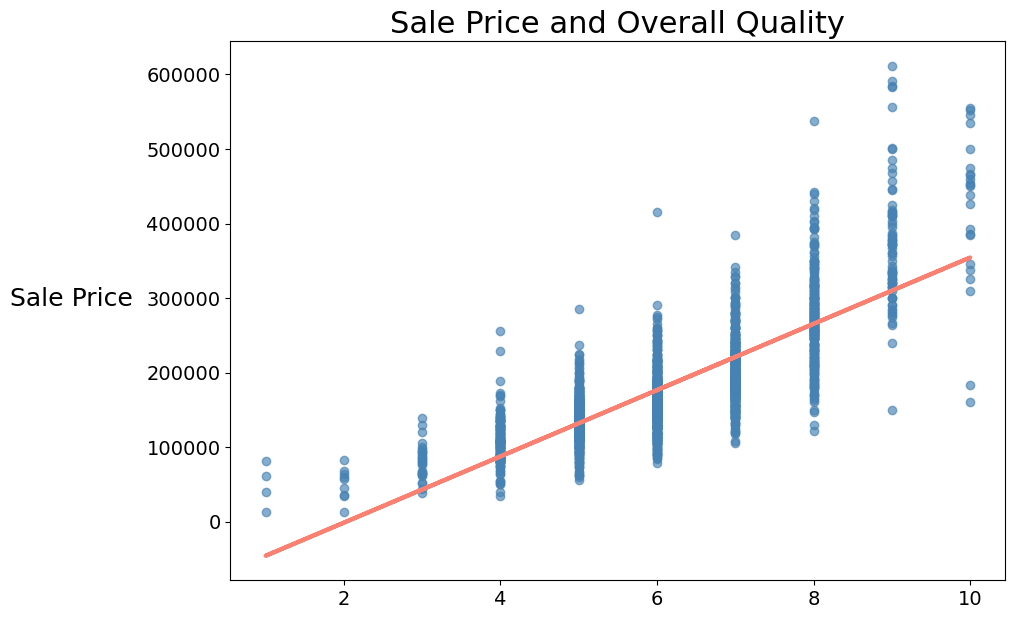

In [110]:
plt.figure(figsize=(10,7))
plt.title("Sale Price and Overall Quality", fontsize = 22)
plt.ylabel('Sale Price ',rotation = 0, ha='right', fontsize = 18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.scatter(df['Overall Qual'], 
            df['SalePrice'],
           color = 'steelblue',
           alpha = 0.65);

plt.plot(df['Overall Qual'],
        df['slr_bf_overall_qual'],
        color='salmon', lw=3);

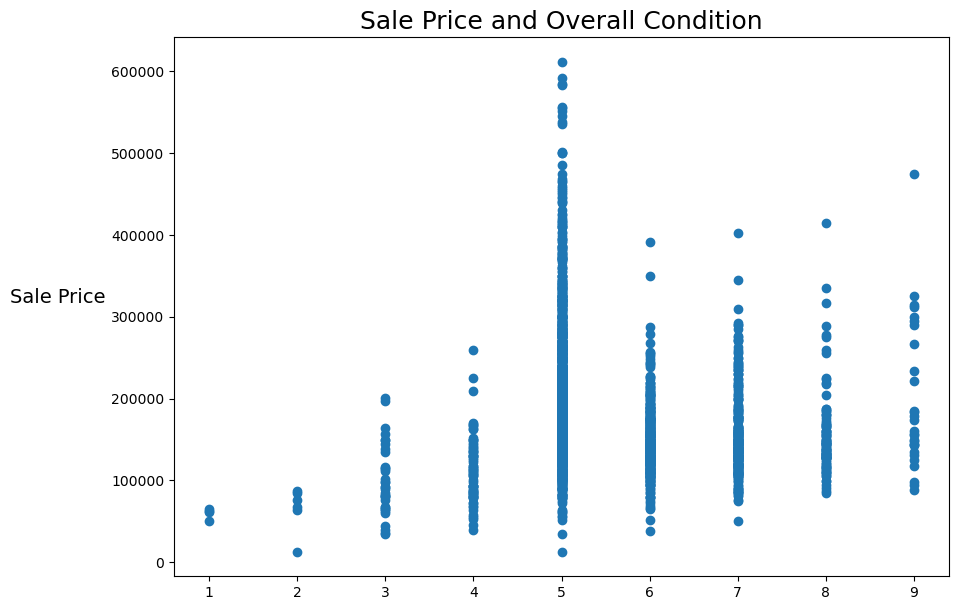

In [111]:
plt.figure(figsize=(10,7))
plt.title("Sale Price and Overall Condition", fontsize = 18)
plt.ylabel('Sale Price',rotation = 0, ha='right', fontsize = 14)
plt.scatter(df['Overall Cond'], 
            df['SalePrice']);

In [112]:
df['slr_bf_Gr_Liv_Area'] = line_of_best_fit(df['Gr Liv Area'],
                                            df['SalePrice'])

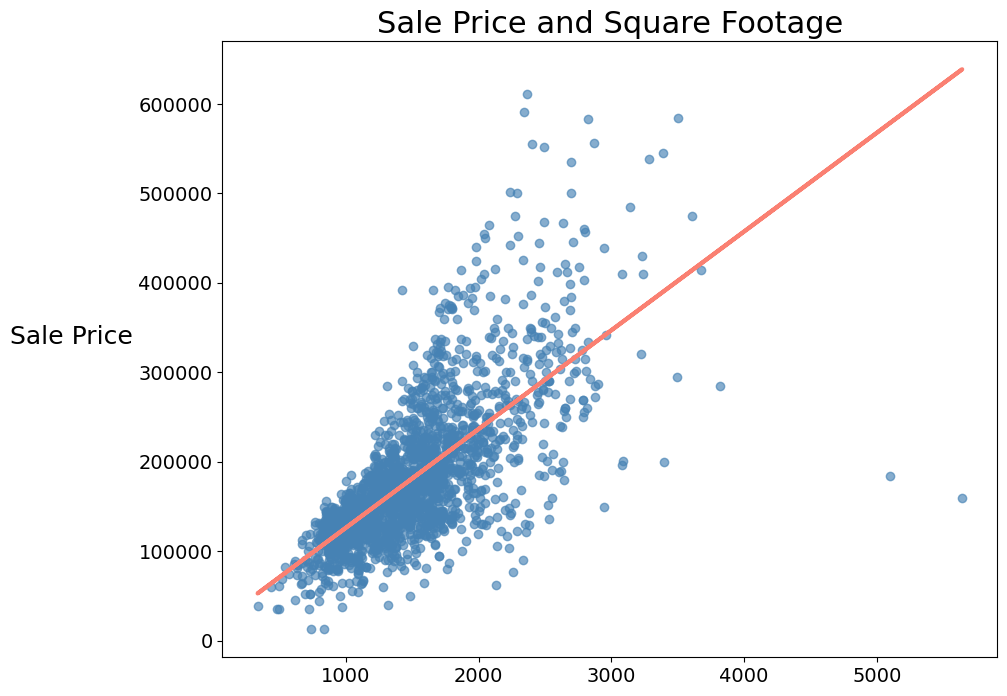

In [113]:
plt.figure(figsize=(10,8))
plt.title("Sale Price and Square Footage", fontsize = 22)
plt.ylabel('Sale Price',rotation = 0, ha='right', fontsize = 18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.scatter(df['Gr Liv Area'], 
            df['SalePrice'],
           color = 'steelblue',
           alpha=0.65)

plt.plot(df['Gr Liv Area'], 
         df['slr_bf_Gr_Liv_Area'], color='salmon', lw=3);

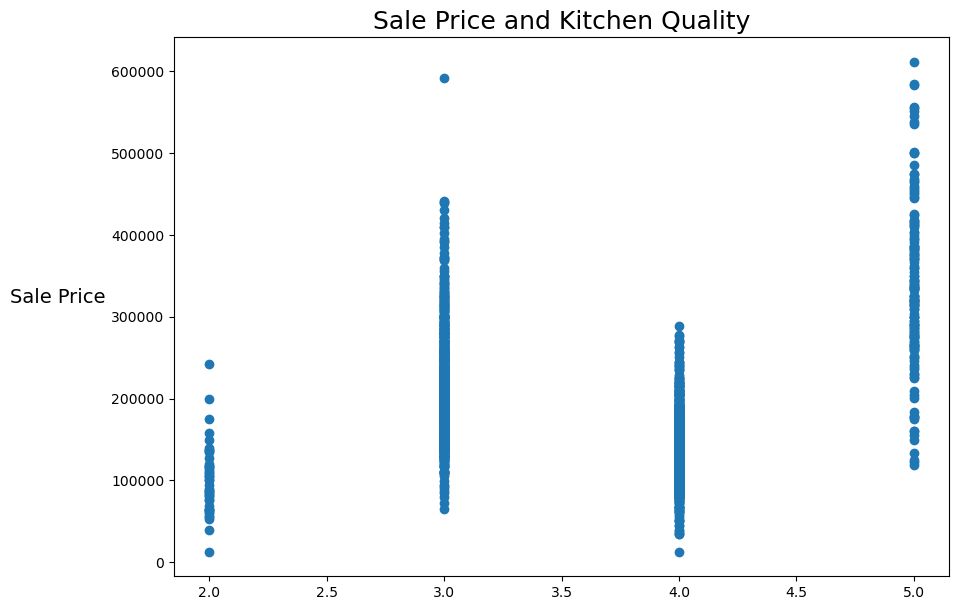

In [114]:
plt.figure(figsize=(10,7))
plt.title("Sale Price and Kitchen Quality", fontsize = 18)
plt.ylabel('Sale Price',rotation = 0, ha='right', fontsize = 14)
plt.scatter(df['Kitchen Qual'], 
            df['SalePrice']);

In [115]:
df['slr_bf_Garage'] = line_of_best_fit(df['Garage Area'],
                                            df['SalePrice'])

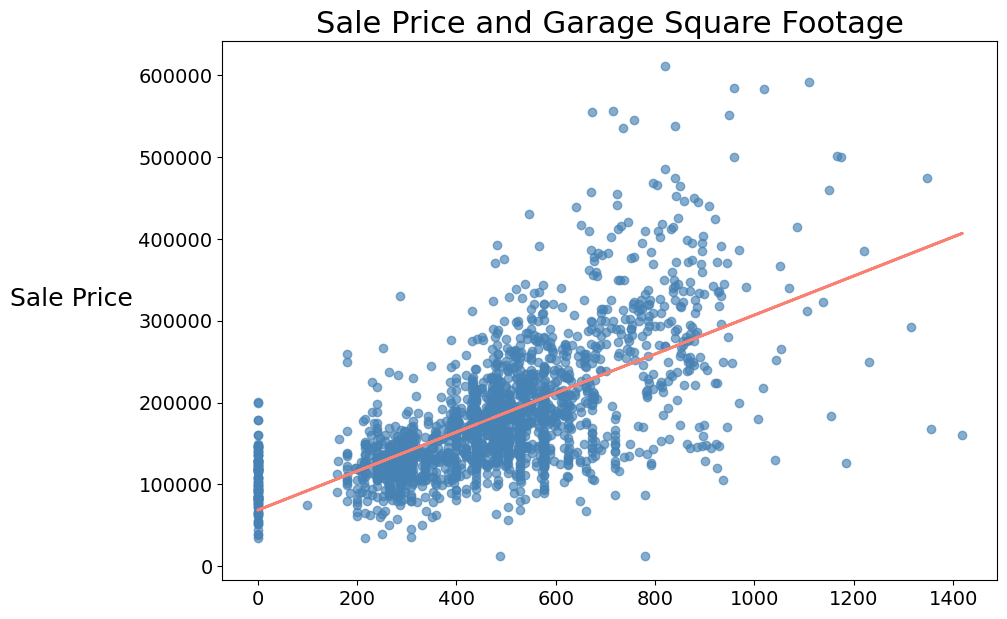

In [116]:
plt.figure(figsize=(10,7))

plt.title("Sale Price and Garage Square Footage", fontsize = 22)
plt.ylabel('Sale Price',rotation = 0, ha='right', fontsize = 18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.scatter(df['Garage Area'], 
            df['SalePrice'], 
           color='steelblue',
           alpha = 0.65);

plt.plot(df['Garage Area'], 
         df['slr_bf_Garage'], color='salmon', lw=2);

In [117]:
df_gar = df

In [118]:
df_gar['gar^2'] = df_gar['Garage Area']*df_gar['Garage Area']

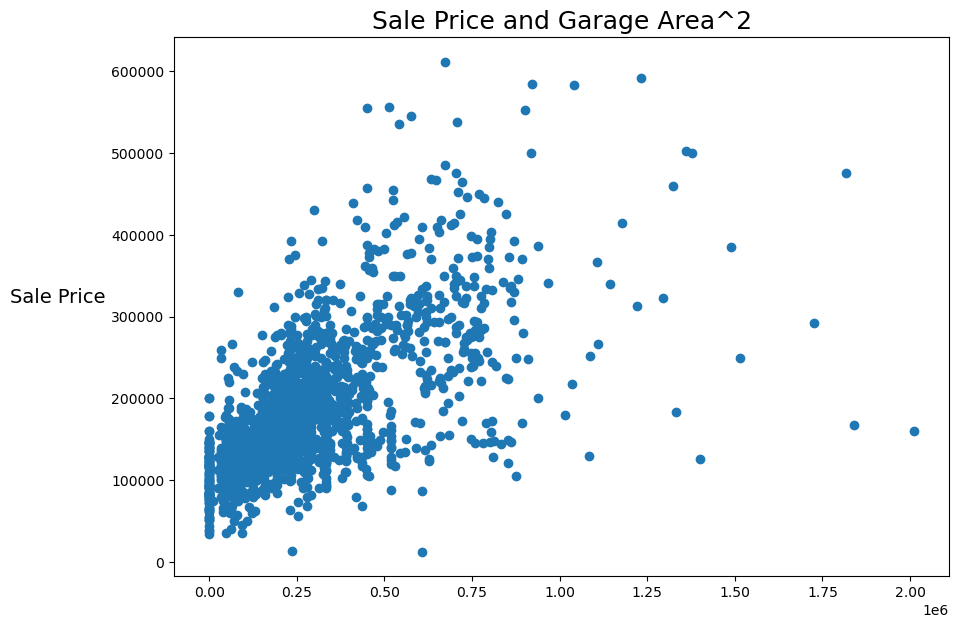

In [119]:
# Squaring this term does not seem to help heteroskedasticity so I'll leave it alone
plt.figure(figsize=(10,7))
plt.title("Sale Price and Garage Area^2", fontsize = 18)
plt.ylabel('Sale Price',rotation = 0, ha='right', fontsize = 14)
plt.scatter(df_gar['gar^2'], 
            df_gar['SalePrice']);

In [120]:
train['SalePrice'].mean()

181469.70160897123

In [121]:
pd.DataFrame(train.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)[:16])

,SalePrice
Neighborhood,
StoneBr,329675.736842
NridgHt,322831.352459
NoRidge,316294.125000
GrnHill,280000.000000
Veenker,253570.588235
Timber,241051.354167
Somerst,227183.900000
ClearCr,217490.074074
Crawfor,205901.211268


In [122]:
df_neighborhoods = pd.DataFrame(train.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)[:5])

In [123]:
df_neighborhoods.reset_index(inplace=True)

In [124]:
df_neighborhoods

,Neighborhood,SalePrice
0,StoneBr,329675.736842
1,NridgHt,322831.352459
2,NoRidge,316294.125000
3,GrnHill,280000.000000
4,Veenker,253570.588235


In [125]:
df_neighborhoods['Neighborhood'] = df_neighborhoods['Neighborhood'].replace({'StoneBr':'Stone Brook',
                        'NridgHt': 'Northridge Heights',
                        'NoRidge':'Northridge',
                        'GrnHill': 'Green Hills'})

In [126]:
df_neighborhoods

,Neighborhood,SalePrice
0,Stone Brook,329675.736842
1,Northridge Heights,322831.352459
2,Northridge,316294.125000
3,Green Hills,280000.000000
4,Veenker,253570.588235


In [127]:
average_price = pd.DataFrame({'Neighborhood':['Average Sale Price'],
                'SalePrice': [181469.701609]})

In [128]:
df_neighborhoods = pd.concat([df_neighborhoods,average_price], ignore_index=True)

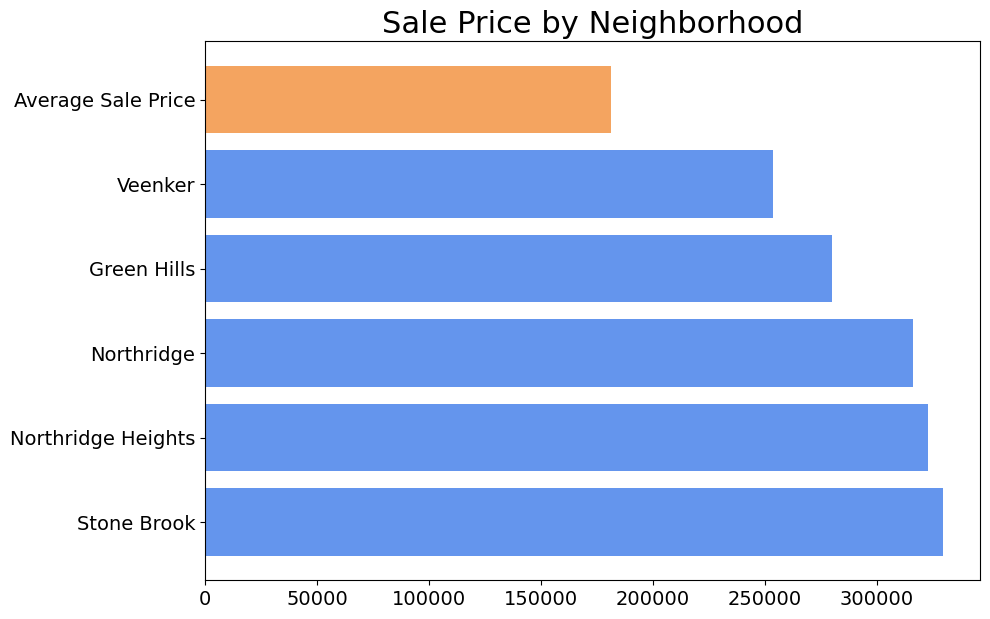

In [129]:
plt.figure(figsize=(10,7))
plt.title('Sale Price by Neighborhood', fontsize=22)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.barh(df_neighborhoods['Neighborhood'],
        df_neighborhoods['SalePrice'],
        color=('cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue',
               'cornflowerblue','sandybrown'));

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049 entries, 0 to 2050
Data columns (total 78 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MS SubClass           2049 non-null   int64  
 1   Lot Area              2049 non-null   int64  
 2   Overall Qual          2049 non-null   int64  
 3   Overall Cond          2049 non-null   int64  
 4   Year Built            2049 non-null   int64  
 5   Heating               2049 non-null   object 
 6   Heating QC            2049 non-null   int64  
 7   Central Air           2049 non-null   int64  
 8   1st Flr SF            2049 non-null   int64  
 9   2nd Flr SF            2049 non-null   int64  
 10  Gr Liv Area           2049 non-null   int64  
 11  Full Bath             2049 non-null   int64  
 12  Half Bath             2049 non-null   int64  
 13  Bedroom AbvGr         2049 non-null   int64  
 14  Kitchen AbvGr         2049 non-null   int64  
 15  Kitchen Qual          2049

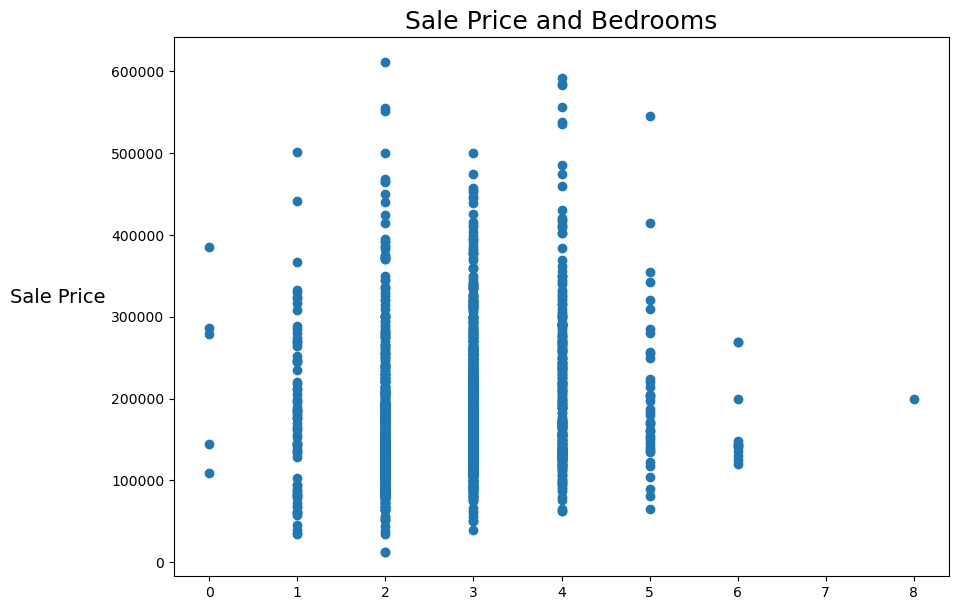

In [131]:
plt.figure(figsize=(10,7))
plt.title("Sale Price and Bedrooms", fontsize = 18)
plt.ylabel('Sale Price',rotation = 0, ha='right', fontsize = 14)
plt.scatter(df['Bedroom AbvGr'], 
            df['SalePrice']);

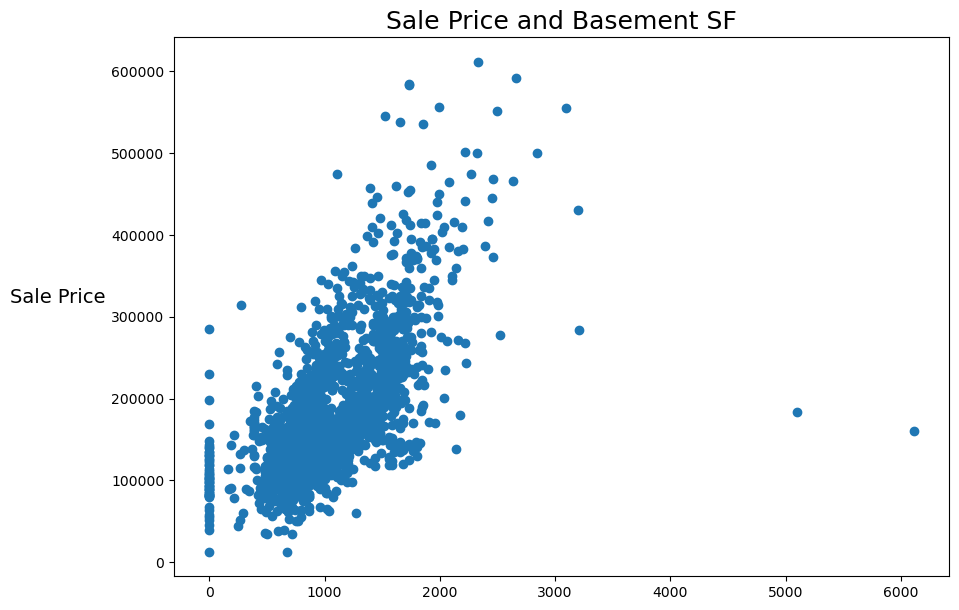

In [132]:
plt.figure(figsize=(10,7))
plt.title("Sale Price and Basement SF", fontsize = 18)
plt.ylabel('Sale Price',rotation = 0, ha='right', fontsize = 14)
plt.scatter(df['Total Bsmt SF'], 
            df['SalePrice']);

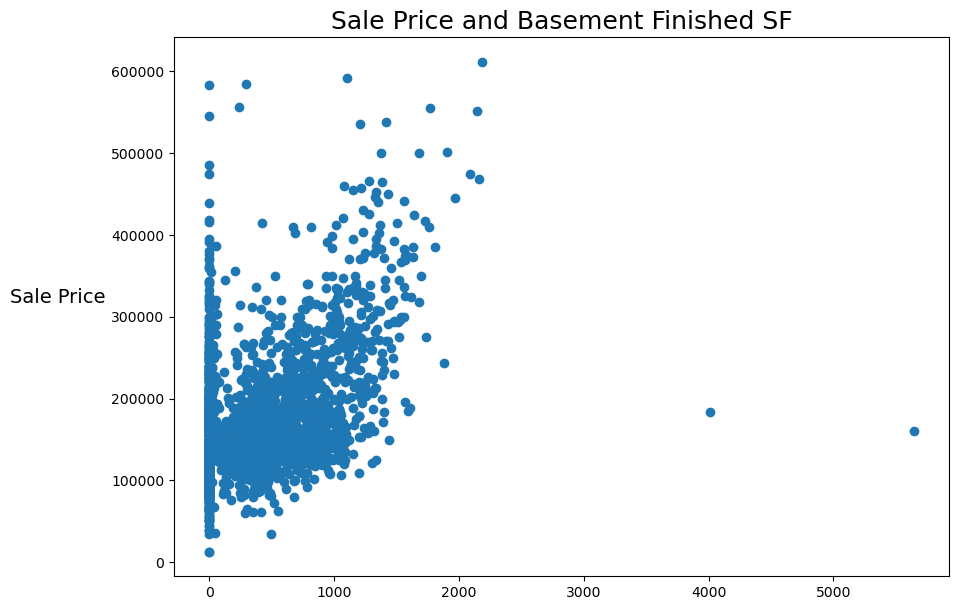

In [133]:
plt.figure(figsize=(10,7))
plt.title("Sale Price and Basement Finished SF", fontsize = 18)
plt.ylabel('Sale Price',rotation = 0, ha='right', fontsize = 14)
plt.scatter(df['BsmtFin SF 1'], 
            df['SalePrice']);

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049 entries, 0 to 2050
Data columns (total 78 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MS SubClass           2049 non-null   int64  
 1   Lot Area              2049 non-null   int64  
 2   Overall Qual          2049 non-null   int64  
 3   Overall Cond          2049 non-null   int64  
 4   Year Built            2049 non-null   int64  
 5   Heating               2049 non-null   object 
 6   Heating QC            2049 non-null   int64  
 7   Central Air           2049 non-null   int64  
 8   1st Flr SF            2049 non-null   int64  
 9   2nd Flr SF            2049 non-null   int64  
 10  Gr Liv Area           2049 non-null   int64  
 11  Full Bath             2049 non-null   int64  
 12  Half Bath             2049 non-null   int64  
 13  Bedroom AbvGr         2049 non-null   int64  
 14  Kitchen AbvGr         2049 non-null   int64  
 15  Kitchen Qual          2049

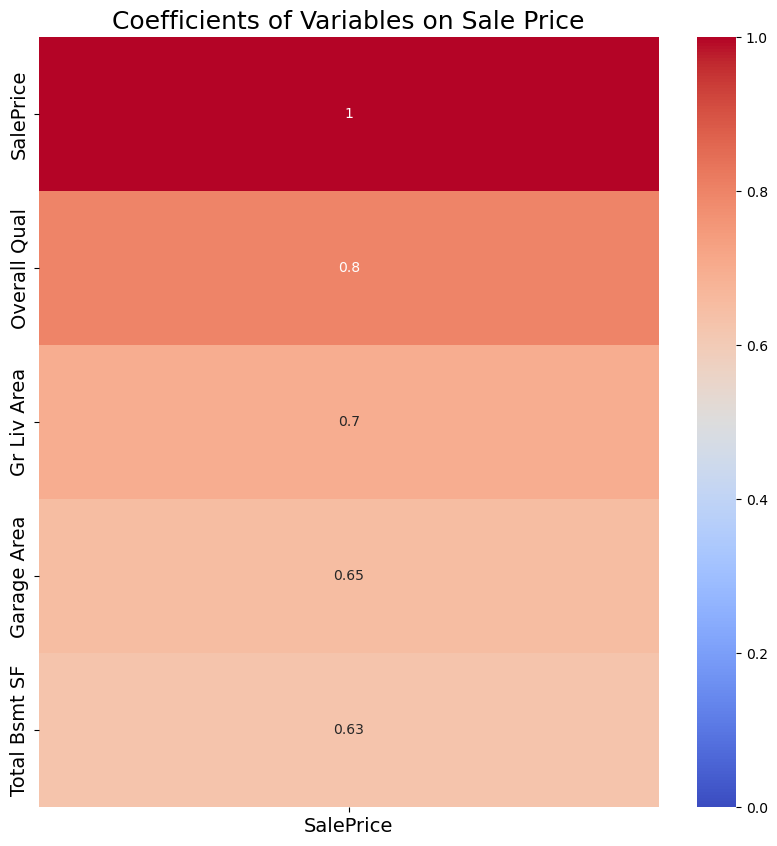

In [135]:
plt.figure(figsize=(10,10))
plt.title('Coefficients of Variables on Sale Price', fontsize = 18)

plt.yticks(fontsize=14, rotation = 0)
plt.xticks(fontsize=14)

sns.heatmap(df[['SalePrice', 'Overall Qual','Gr Liv Area', 'Garage Area', 
                'Total Bsmt SF']].corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
            ,annot = True, cmap= 'coolwarm',
           vmin=-0,
           vmax=1);